# 1. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

# for Q-Q plots
import pylab
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

# import several machine learning algorithms
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to evaluate the models
from sklearn.metrics import roc_auc_score

# to separate data into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split


pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# display various ranges 
pd.options.display.float_format = '{:.4f}'.format

print("Setup complete...")

Setup complete...


----------------------------------------------------------------------

# 2. Import dataset

### 2.1 Lending Club

In [3]:
df1 = pd.read_csv('loan.csv')
print(df1.shape)
df1.head()

(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,nan,nan,2500,2500,2500.0000,36 months,13.5600,84.9200,C,C1,Chef,10+ years,RENT,55000.0000,Not Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.2400,0.0000,Apr-2001,1.0000,nan,45.0000,9.0000,1.0000,4341,10.3000,34.0000,w,2386.0200,2386.0200,167.0200,167.0200,113.9800,53.0400,0.0000,0.0000,0.0000,Feb-2019,84.9200,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,0.0000,16901.0000,2.0000,2.0000,1.0000,2.0000,2.0000,12560.0000,69.0000,2.0000,7.0000,2137.0000,28.0000,42000.0000,1.0000,11.0000,2.0000,9.0000,1878.0000,34360.0000,5.9000,0.0000,0.0000,140.0000,212.0000,1.0000,1.0000,0.0000,1.0000,nan,2.0000,nan,0.0000,2.0000,5.0000,3.0000,3.0000,16.0000,7.0000,18.0000,5.0000,9.0000,0.0000,0.0000,0.0000,3.0000,100.0000,0.0000,1.0000,0.0000,60124.0000,16901.0000,36500.0000,18124.0000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,nan,nan,30000,30000,30000.0000,60 months,18.9400,777.2300,D,D2,Postmaster,10+ years,MORTGAGE,90000.0000,Source Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.5200,0.0000,Jun-1987,0.0000,71.0000,75.0000,13.0000,1.0000,12315,24.2000,44.0000,w,29387.7500,29387.7500,1507.1100,1507.1100,612.2500,894.8600,0.0000,0.0000,0.0000,Feb-2019,777.2300,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,1208.0000,321915.0000,4.0000,4.0000,2.0000,3.0000,3.0000,87153.0000,88.0000,4.0000,5.0000,998.0000,57.0000,50800.0000,2.0000,15.0000,2.0000,10.0000,24763.0000,13761.0000,8.3000,0.0000,0.0000,163.0000,378.0000,4.0000,3.0000,3.0000,4.0000,nan,4.0000,nan,0.0000,2.0000,4.0000,4.0000,9.0000,

### 2.2. Titanic

In [4]:
df2 = pd.read_csv('Train_Titanic.csv')
print(df2.shape)
df2.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


### 2.3 House price

In [5]:
df3 = pd.read_csv('houseprice.csv')
print(df3.shape)
df3.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2.4. Boston house price

In [6]:
boston_dataset = load_boston()
df4 = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
print(df4.shape)
df4.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


In [29]:
org_df1 = df1.copy()
org_df2 = df2.copy()
org_df3 = df3.copy()
org_df4 = df4.copy()

----------------------------------------------------------------------

# 9. Feature Scaling

## Normalisation - Standarisation

We saw in previous lectures in section 3 of this course, that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of setting the magnitude of the variables to the same range of values.


#### Normalisation

One method utilised to bring all the variables to a more homogeneous scale is normalisation. Normalisation is synonym of centering the distribution. This means subtracting the mean of the variable to each observation. This procedure will "center" the new distribution at zero (the new mean of the variable will now be zero).

#### Standarisation

Standarisation is also used to bring all the variables to a similar scale. Standarisation means centering the variable at zero, and standarising the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x_mean) /  std

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

Let's demonstrate the procedure of standarisation on the titanic dataset.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
# let's have a look at the values of those variables to get an idea of the magnitudes
data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


The different variables present different value ranges, therefore different magnitudes. Not only the minimum and maximum values are different, but they also spread over ranges of different widths.

In [4]:
# let's look at missing data

data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

Age contains missing information, so I will fill those observations with the median in the next cell.

In [5]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [6]:
# let's fill first the missing data

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

### Standarisation

StandardScaler from scikit-learn removes the mean and scales the data to unit variance. 

In [7]:
# standarisation: we use the StandardScaler from sklearn

scaler = StandardScaler() # create an object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it
X_test_scaled = scaler.transform(X_test) # transform the test set

In [8]:
#let's have a look at the scaled training dataset: mean and standard deviation

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [  4.98976640e-17   1.16903099e-16   5.41746067e-17]
std (Pclass, Age and Fare):  [ 1.  1.  1.]


As expected, the mean of each variable is now around zero and the standard deviation is set to 1. Thus, all the variable  values lie within the same range.

In [9]:
# let's look at the transformed min and max values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.5325562  -2.23351124 -0.67314402]
Max values (Pclass, Age and Fare):  [ 0.84844757  3.86209655  9.95192344]


However, the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers. We observed in previous lectures that the variable Fare has a few extreme outliers, that is, people that paid extraordinarily high Fares. Those observations would drive the value of the maximum value far away from the unit variance (a value of 9.9 in this case).

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([-2.23351124, -1.92873085, -1.62395046, -1.31917007, -1.01438968,
        -0.70960929, -0.4048289 , -0.10004851,  0.20473188,  0.50951227,
         0.81429266,  1.11907305,  1.42385344,  1.72863383,  2.03341422,
         2.33819461,  2.642975  ,  2.94775539,  3.25253577,  3.55731616,
         3.86209655]),
 <a list of 20 Patch objects>)

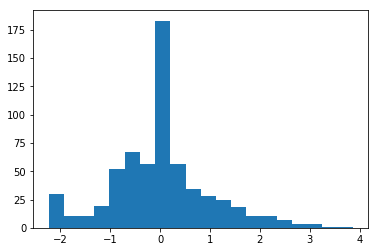

In [10]:
# let's look at the distribution of the transformed variable Age

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([-0.67314402, -0.14189064,  0.38936273,  0.9206161 ,  1.45186948,
         1.98312285,  2.51437622,  3.04562959,  3.57688297,  4.10813634,
         4.63938971,  5.17064309,  5.70189646,  6.23314983,  6.76440321,
         7.29565658,  7.82690995,  8.35816333,  8.8894167 ,  9.42067007,
         9.95192344]),
 <a list of 20 Patch objects>)

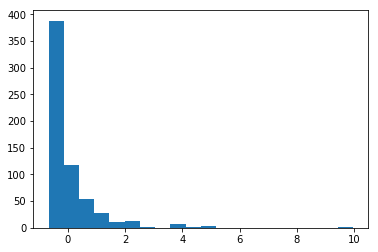

In [11]:
# let's look at the distribution of the transformed variable Fare

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot. In fact, we can see that the standarisation of Fare, shrinks the majority of the observations towards the lowest values.

In [12]:
import seaborn as sns

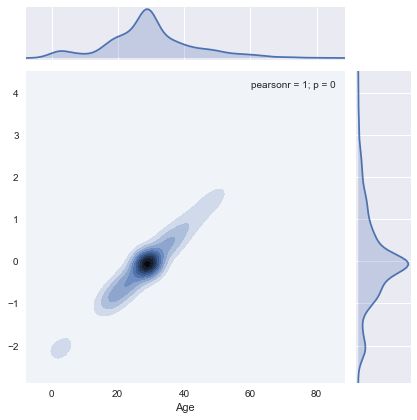

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

The transformed variable has a good correlation with the original one.

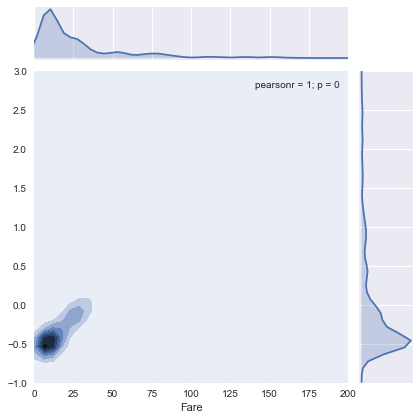

In [14]:
# let's look at how transformed Fare looks like compared to the original variable

sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

The values are concentrated on the lower left side of the plot, because Fare is highly skewed: the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values as shown in the left figure above.

Other scaling methods account for the presence of outliers. I will discuss those in the next lectures.

## Scaling to minimum and maximum values

We saw in previous lectures that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of squeezing the magnitude of the variables.


Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the range:

X_scaled = (X - X.min / (X.max - X.min)

The minimum maximum scaling method has the same disadvantage that standarisation, which is that it compresses the observations in the narrow range if the variable is very skewed or has outliers. 

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

Let's demonstrate the MinMaxScaling method using scikit-learn.


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
# let's have a look at the values of those variables to get an idea of the magnitudes

data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


We can see from the above statistics table that the magnitudes of the variables are different. The mean values and medians are different as well as the maximum values and the range over which the values are spread.

In [4]:
# check missing data

data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

Age contains missing information, so I will fill those observations with the median in the next cell.

In [5]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [6]:
# fill missing data with the Age median

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

### Min_max_scaling

In [7]:
# this scales the features between 0 and 1.

scaler = MinMaxScaler() # create an instance
X_train_scaled = scaler.fit_transform(X_train) #  fit  the scaler to the train set and then transform it
X_test_scaled = scaler.transform(X_test) # transform (scale) the test set

In [8]:
#let's have a look at the scaled training dataset: mean and standard deviation

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [ 0.64365971  0.36641321  0.06335433]
std (Pclass, Age and Fare):  [ 0.41999093  0.16405255  0.09411705]


After MinMaxScaling, the distributions are not centered in zero and the standard deviation is not 1 as when normalising the data.

In [9]:
# let's look at the new minimum and maximum values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [ 0.  0.  0.]
Max values (Pclass, Age and Fare):  [ 1.  1.  1.]


But the minimum and maximum values are standarised across variables, different from what occurs with standarisation.

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

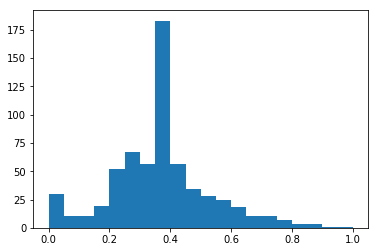

In [10]:
# let's look at the distributions of the transformed variables: Age

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

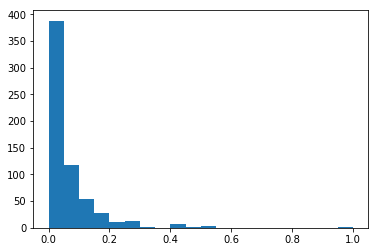

In [11]:
# let's look at the distributions of the transformed variables: Fare

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot. In fact, we can see that the MinMaxScaling of Fare, shrinks the majority of the observations towards the lowest values.

In [12]:
import seaborn as sns

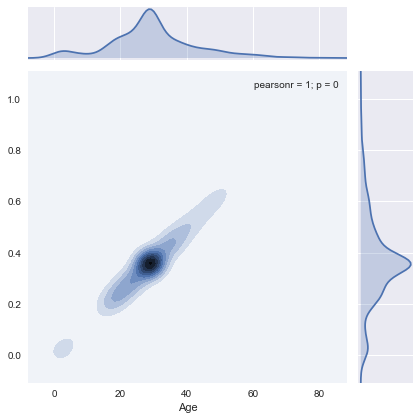

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

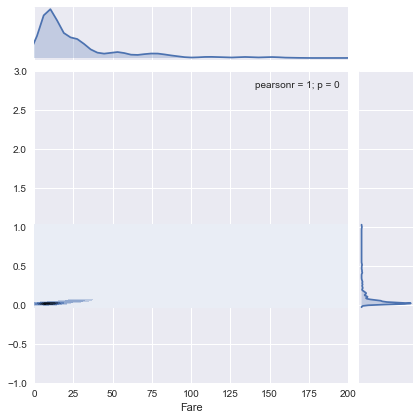

In [14]:
# let's look at how transformed Fare looks like compared to the original variable


sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

As we can see from the above plot, MinMaxScaler is very sensitive to the presence of outliers. It compressed all inliers in the narrow range [0, 0.01] limiting the spread of the variable, and therefore, very likely it would affect the predictive power of this feature.

## Scaling to median and quantiles

We saw in previous lectures that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of squeezing the magnitude of the variables.


Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


Let's demonstrate the Median and Quantile scaling method using scikit-learn. The function of sklearn to perform this procedure is the RobustScaler

In [1]:
import pandas as pd
import numpy as np

# RobustScaler from sklearn performs the above described operation
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
# let's have a look at the values of those variables to get an idea of the magnitudes
data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


We can see from the above statistics table that the magnitudes of the variables are different. The mean values and medians are different as well as the maximum values and the range over which the values are spread.

In [4]:
# let's check at missing  data

data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

Age contains missing information, so I will fill those observations with the median in the next cell.

In [5]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [6]:
# let's fill the missing data

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

### Robust Scaler

In [7]:
# robust scaler

scaler = RobustScaler() # call the object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then scale it
X_test_scaled = scaler.transform(X_test) # scale the test set

In [8]:
#let's have a look at the scaled training dataset

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [-0.47512039  0.0567354   0.7440926 ]
std (Pclass, Age and Fare):  [ 0.55998791  1.00109914  2.05514812]


As you can see, the distributions are not centered in zero and the standard deviation is not 1 as when normalising the data.

In [9]:
# let's look at the new minimum and maximum values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.33333333 -2.17923077 -0.63931806]
Max values (Pclass, Age and Fare):  [  0.           3.92307692  21.19676931]


Neither are the minimum and maximum values set to a certain upper and lower boundaries like in the MinMaxScaler

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([-2.17923077, -1.87411538, -1.569     , -1.26388462, -0.95876923,
        -0.65365385, -0.34853846, -0.04342308,  0.26169231,  0.56680769,
         0.87192308,  1.17703846,  1.48215385,  1.78726923,  2.09238462,
         2.3975    ,  2.70261538,  3.00773077,  3.31284615,  3.61796154,
         3.92307692]),
 <a list of 20 Patch objects>)

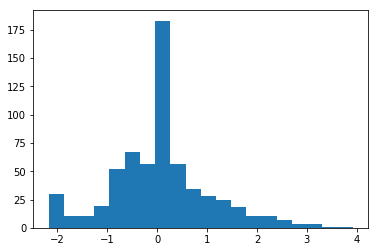

In [10]:
# let's look at the distribution of Age transformed

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([ -0.63931806,   0.45248631,   1.54429068,   2.63609505,
          3.72789941,   4.81970378,   5.91150815,   7.00331252,
          8.09511689,   9.18692126,  10.27872563,  11.37052999,
         12.46233436,  13.55413873,  14.6459431 ,  15.73774747,
         16.82955184,  17.92135621,  19.01316058,  20.10496494,  21.19676931]),
 <a list of 20 Patch objects>)

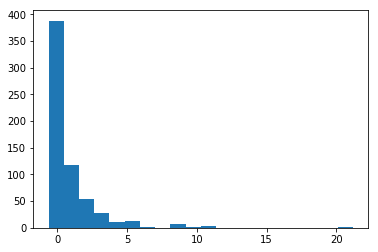

In [11]:
# let's look at the distribution of Fare transformed

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot.

In [12]:
import seaborn as sns

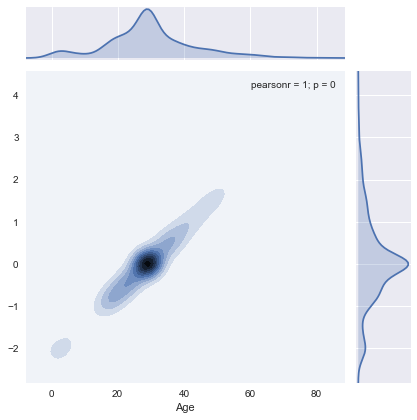

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

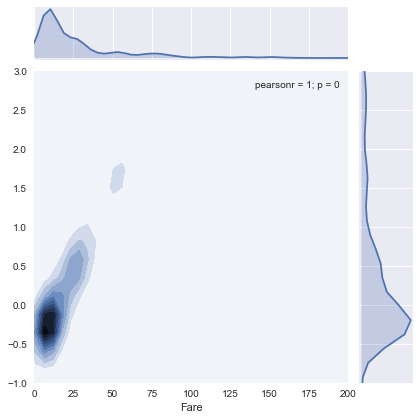

In [14]:
# let's look at how transformed Fare looks like compared to the original variable

sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

As we can see, The robust scaler does a better job at preserving the spread of the variable after transformation for skewed variables like Fare (compare with the standard scaler or the MinMaxScaler)

### Conclusions

Typically, at the time of setting the features within a similar scale for Machine Learning, standarisation is the normalisation method of choice. And this is done without taking into account the distribution of the variable.

However, we have seen in the past 3 lectures that the different normalisation methods have different advantages and disadvantages, and when the distribution of the variable is skewed, perhaps it is better to scale using the mean and quantiles method, which is more robust to the presence of outliers.